# Maze Score and Performance Analysis

In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go
from scipy.interpolate import griddata


## Load the data

In [36]:
# Load the data from the CSV file
csv_file_path = 'complete.csv'  # Update this to the correct path where your file is located
data = pd.read_csv(csv_file_path)
data.head(24)

,Participant,Run,Velocity(m/s),Delay(ms),Time(s),Maze Score,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score
0,1,1,5.0,0,30.51,89.16,60,0,80,20,50,10,36.666667
1,1,2,3.6,0,39.69,100.00,20,0,60,10,20,10,20.000000
2,1,3,6.0,2000,60.09,100.00,80,0,90,60,100,100,71.666667
3,2,1,6.0,0,24.18,78.02,70,0,40,20,50,0,30.000000
4,2,2,2.2,250,62.25,66.87,60,0,0,70,50,50,38.333333
5,2,3,6.0,250,31.78,89.47,70,0,60,70,60,20,46.666667
6,3,1,5.0,2000,61.60,47.72,80,0,70,40,80,75,57.500000
7,3,2,5.0,250,30.97,50.15,20,0,30,20,10,0,13.333333
8,3,3,3.6,500,42.55,63.16,10,0,10,15,10,0,7.500000
9,4,1,3.6,250,38.20,83.51,10,0,25,20,10,0,10.833333


## 1. Descriptive Statistics

In [37]:
# Get rid of participant 7
data = data[data['Participant'] != 7]
# Display descriptive statistics
print("Descriptive Statistics:")
# Describe the data withouth Participant, Run, and Trial columns
data.drop(columns=['Run', 'Delay(ms)', 'Velocity(m/s)']).head(24)


Descriptive Statistics:


,Participant,Time(s),Maze Score,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score
0,1,30.51,89.16,60,0,80,20,50,10,36.666667
1,1,39.69,100.00,20,0,60,10,20,10,20.000000
2,1,60.09,100.00,80,0,90,60,100,100,71.666667
3,2,24.18,78.02,70,0,40,20,50,0,30.000000
4,2,62.25,66.87,60,0,0,70,50,50,38.333333
5,2,31.78,89.47,70,0,60,70,60,20,46.666667
6,3,61.60,47.72,80,0,70,40,80,75,57.500000
7,3,30.97,50.15,20,0,30,20,10,0,13.333333
8,3,42.55,63.16,10,0,10,15,10,0,7.500000
9,4,38.20,83.51,10,0,25,20,10,0,10.833333


In [38]:
# Convert columns to numeric, coercing errors to NaN (skip 'Participant' and 'Run' columns)
data_numeric = data.drop(columns=['Participant', 'Run', 'Physical Demand']).apply(pd.to_numeric, errors='coerce')

# Display descriptive statistics
print("Descriptive Statistics:")
data_numeric.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Velocity(m/s),21.0,4.285714,1.488048,2.20,3.60,5.000000,6.00,6.000000
Delay(ms),21.0,690.476190,741.218431,0.00,0.00,500.000000,1000.00,2000.000000
Time(s),21.0,48.213333,18.983812,22.88,31.78,42.550000,62.25,88.290000
Maze Score,21.0,73.810476,21.489231,35.89,50.15,78.020000,89.47,100.000000
Mental Demand,21.0,45.476190,24.945178,10.00,20.00,50.000000,70.00,80.000000
Temporal Demand,21.0,38.809524,28.762161,0.00,15.00,40.000000,60.00,90.000000
Performance,21.0,31.666667,20.876622,5.00,20.00,20.000000,50.00,70.000000
Effort,21.0,48.571429,29.160884,10.00,20.00,50.000000,75.00,100.000000
Frustration,21.0,22.857143,26.859422,0.00,5.00,10.000000,40.00,100.000000
Overall Score,21.0,31.230159,16.485724,7.50,20.00,31.666667,37.50,71.666667


## 2. Correlation Matrix

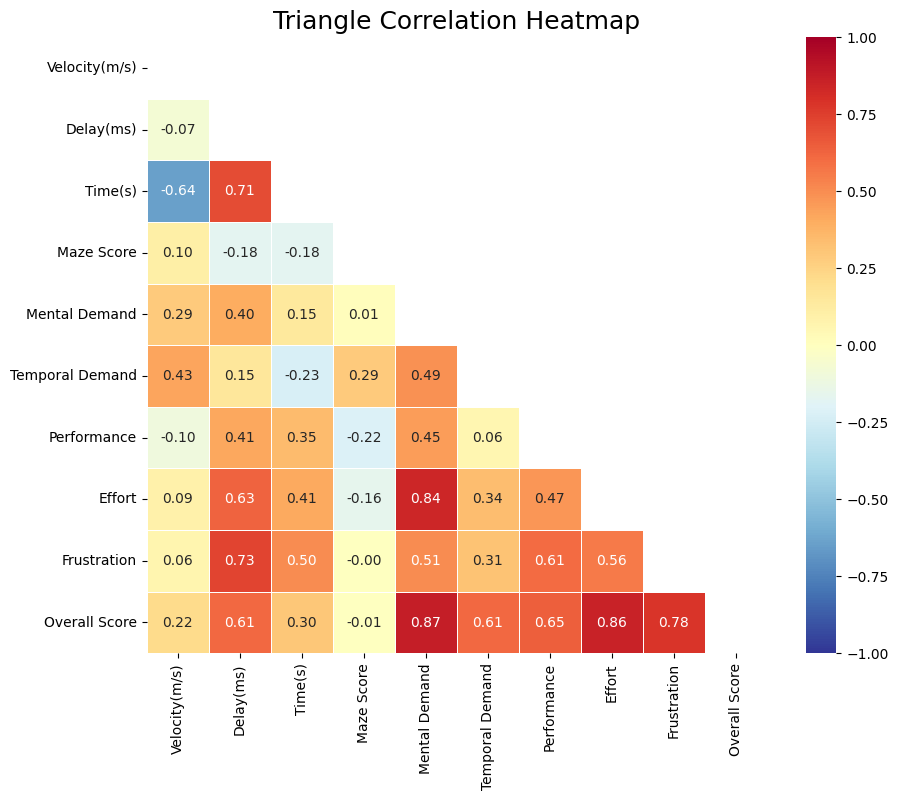

In [39]:

# Generate the correlation matrix to compare the relationship between variables
correlation_matrix = data_numeric.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the triangle correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="RdYlBu_r", fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title("Triangle Correlation Heatmap", fontsize=18)
plt.show()

## 3. Bar plot: Metrics vs Delays

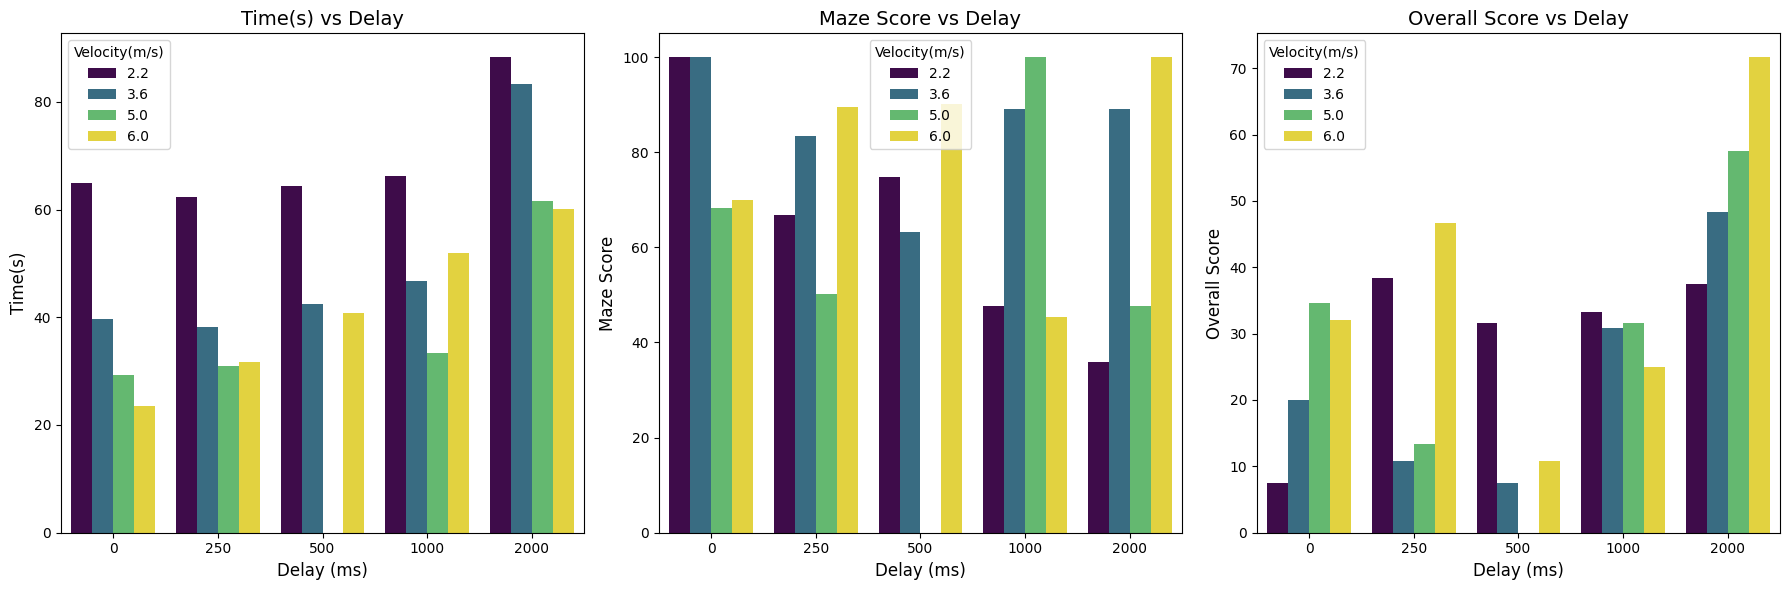

In [40]:
# Function to create a bar plot inside a specific subplot
def bar_plot(ax, data, x, y, title, xlabel, ylabel, hue, palette):
    sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue="Velocity(m/s)", palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

## Barplots: Metrics vs Velocities

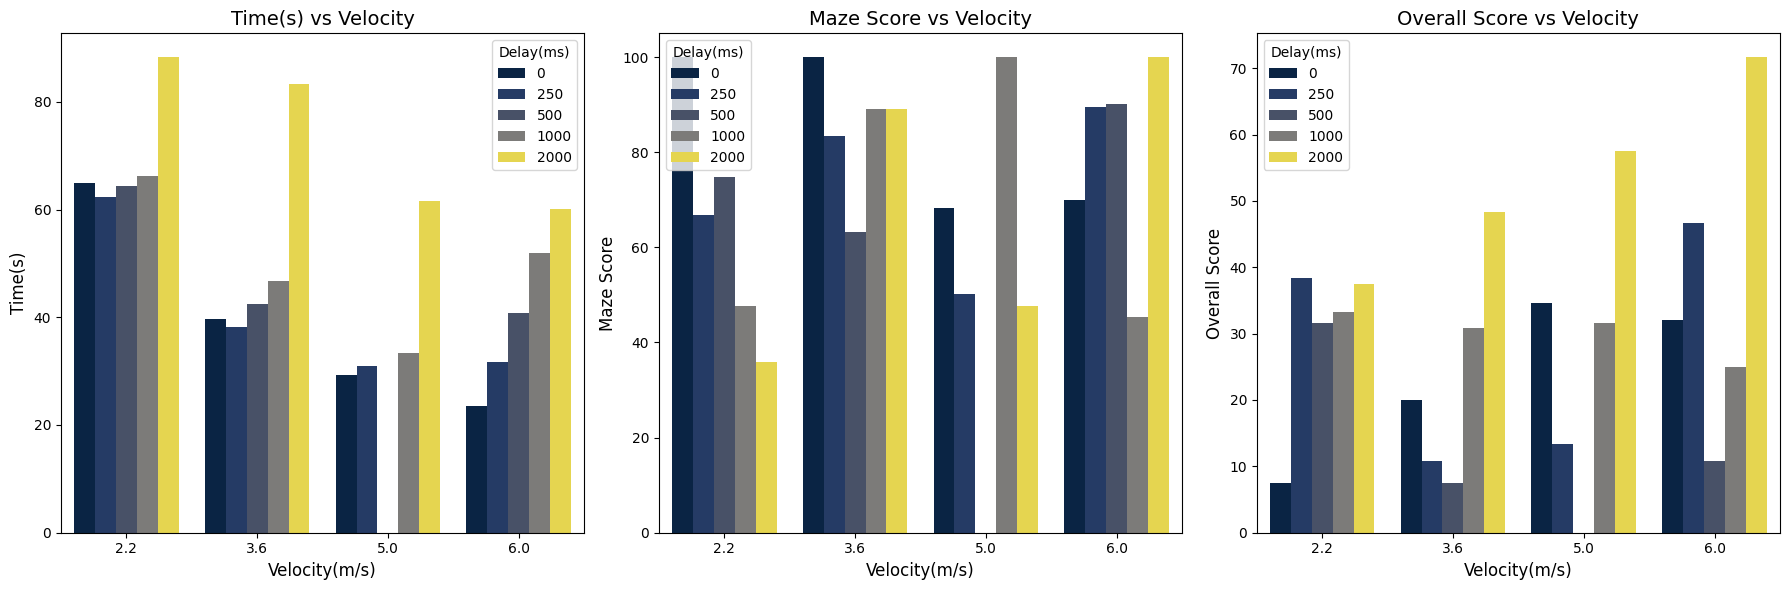

In [41]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Velocity(m/s)', column, f'{column} vs Velocity', 'Velocity(m/s)', column, hue="Delay(ms)", palette="cividis")
# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## Bar plots without Hue: Delay

C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)


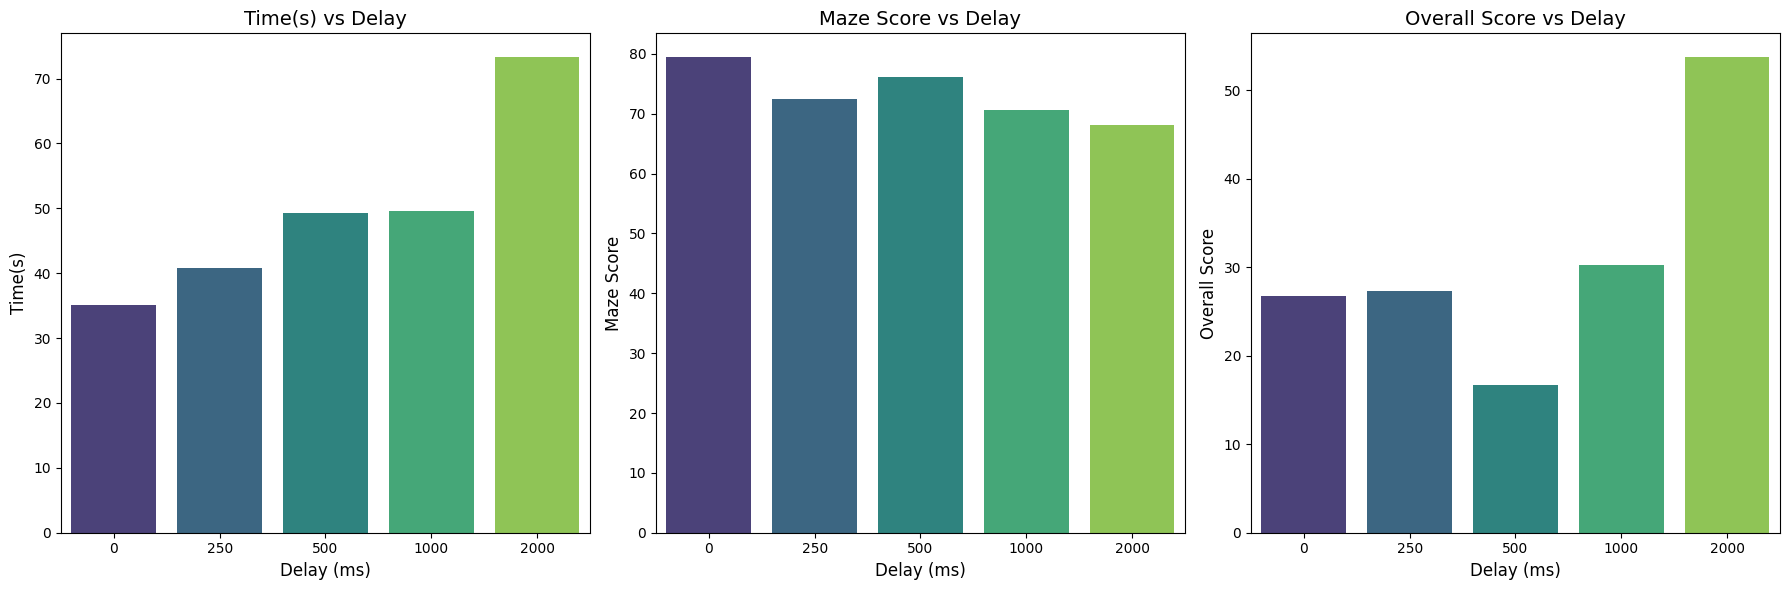

In [42]:
# Function to create a bar plot inside a specific subplot
def bar_plot(ax, data, x, y, title, xlabel, ylabel, hue, palette):
    sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue=None, palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## Bar plots without hue: Velocity

C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)


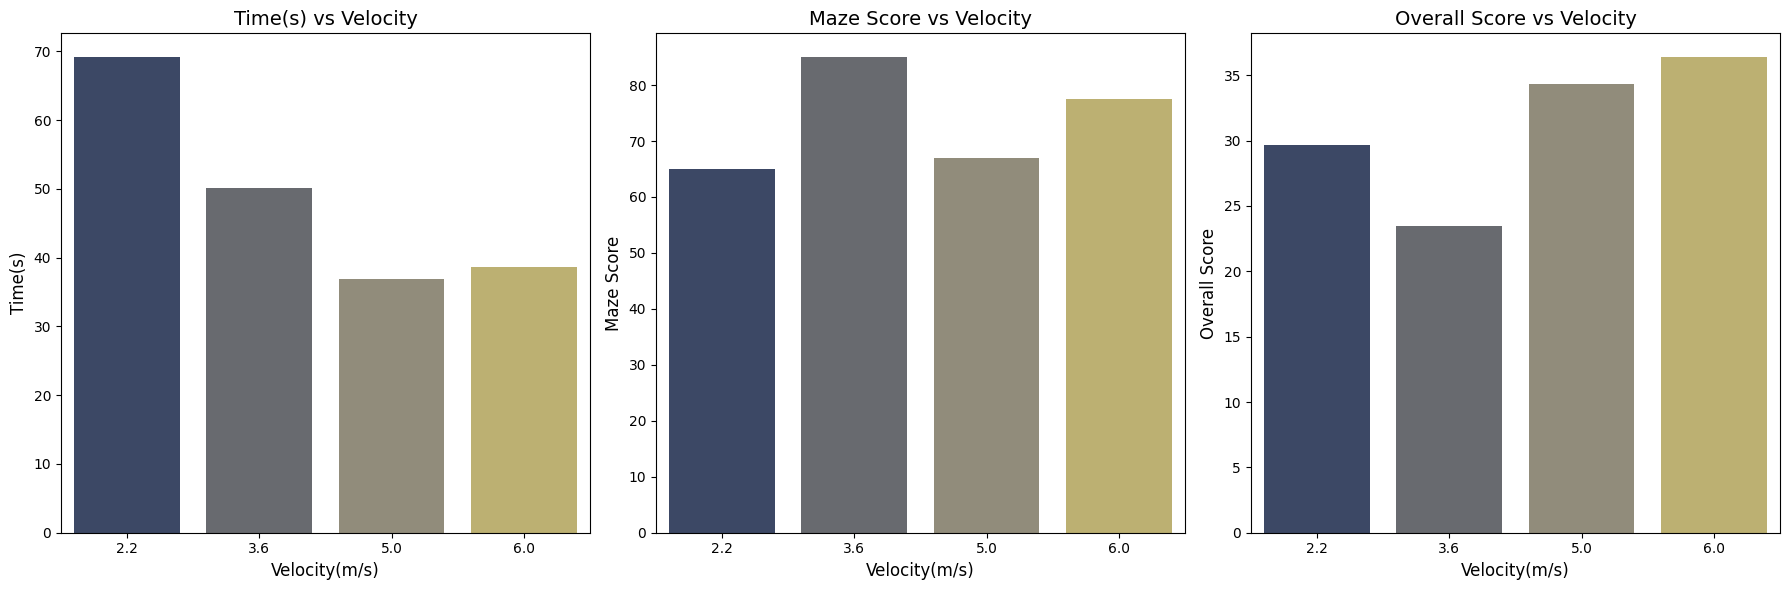

In [43]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Velocity(m/s)', column, f'{column} vs Velocity', 'Velocity(m/s)', column, hue=None, palette="cividis")
# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

## 4. Box plot: Nasa dimensions vs Time delays

## NASA-TLX (Task Load Index)

The NASA Task Load Index (NASA-TLX) is a widely used, subjective workload assessment tool that evaluates the perceived workload of individuals performing a task. It was developed by the Human Performance Group at NASA Ames Research Center. The tool measures workload across six dimensions:

1. **Mental Demand**: The mental and cognitive effort required to perform the task.
2. **Physical Demand**: The physical effort required to perform the task.
3. **Temporal Demand**: The time pressure felt during the task.
4. **Performance**: The individual's perception of their own performance.
5. **Effort**: The overall effort required to achieve the level of performance.
6. **Frustration**: The level of stress and frustration experienced during the task.

Each dimension is rated on a scale from 0 to 100, and the overall workload score is calculated as a weighted average of these ratings. The NASA-TLX is commonly used in human factors and ergonomics research to assess the impact of different tasks and conditions on human performance and workload.

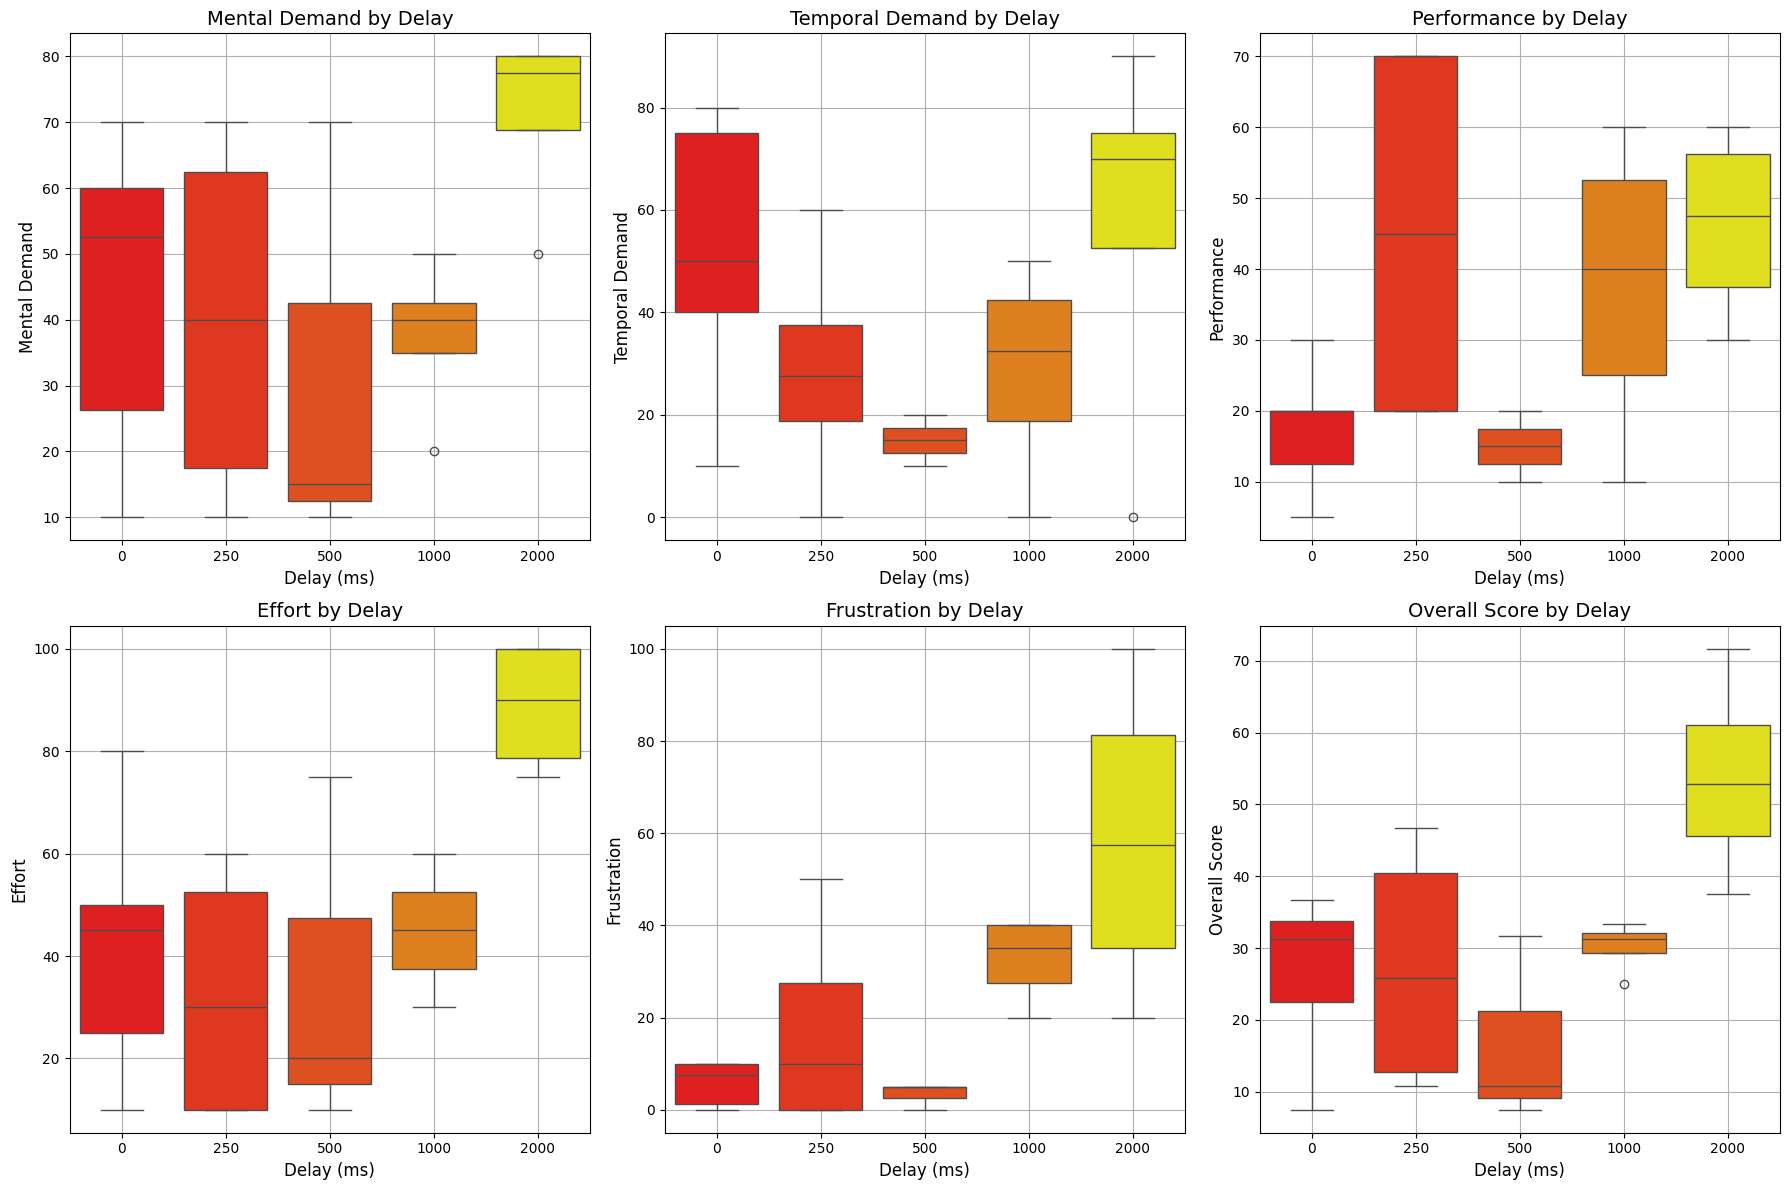

In [44]:
# Let's analyze the NASA-TLX scores by delay using a box plot for each of the NASA-TLX workload dimensions
# Create a function to plot a box plot for each NASA-TLX dimension
def box_plot(ax, data, x, y, title, xlabel, ylabel, palette, hue):
    sns.boxplot(data=data, x=x, y=y, palette=palette, linewidth=1, ax=ax, legend=False, hue=hue)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True)

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust the number of subplots

# List of NASA-TLX dimensions to plot
workload_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Loop over each NASA-TLX dimension and create a subplot
for i, dim in enumerate(workload_dimensions):
    box_plot(axes[i//3, i%3], data, 'Delay(ms)', dim, f'{dim} by Delay', 'Delay (ms)', dim, palette="autumn", hue="Delay(ms)")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## Box plots nasa vs velocities

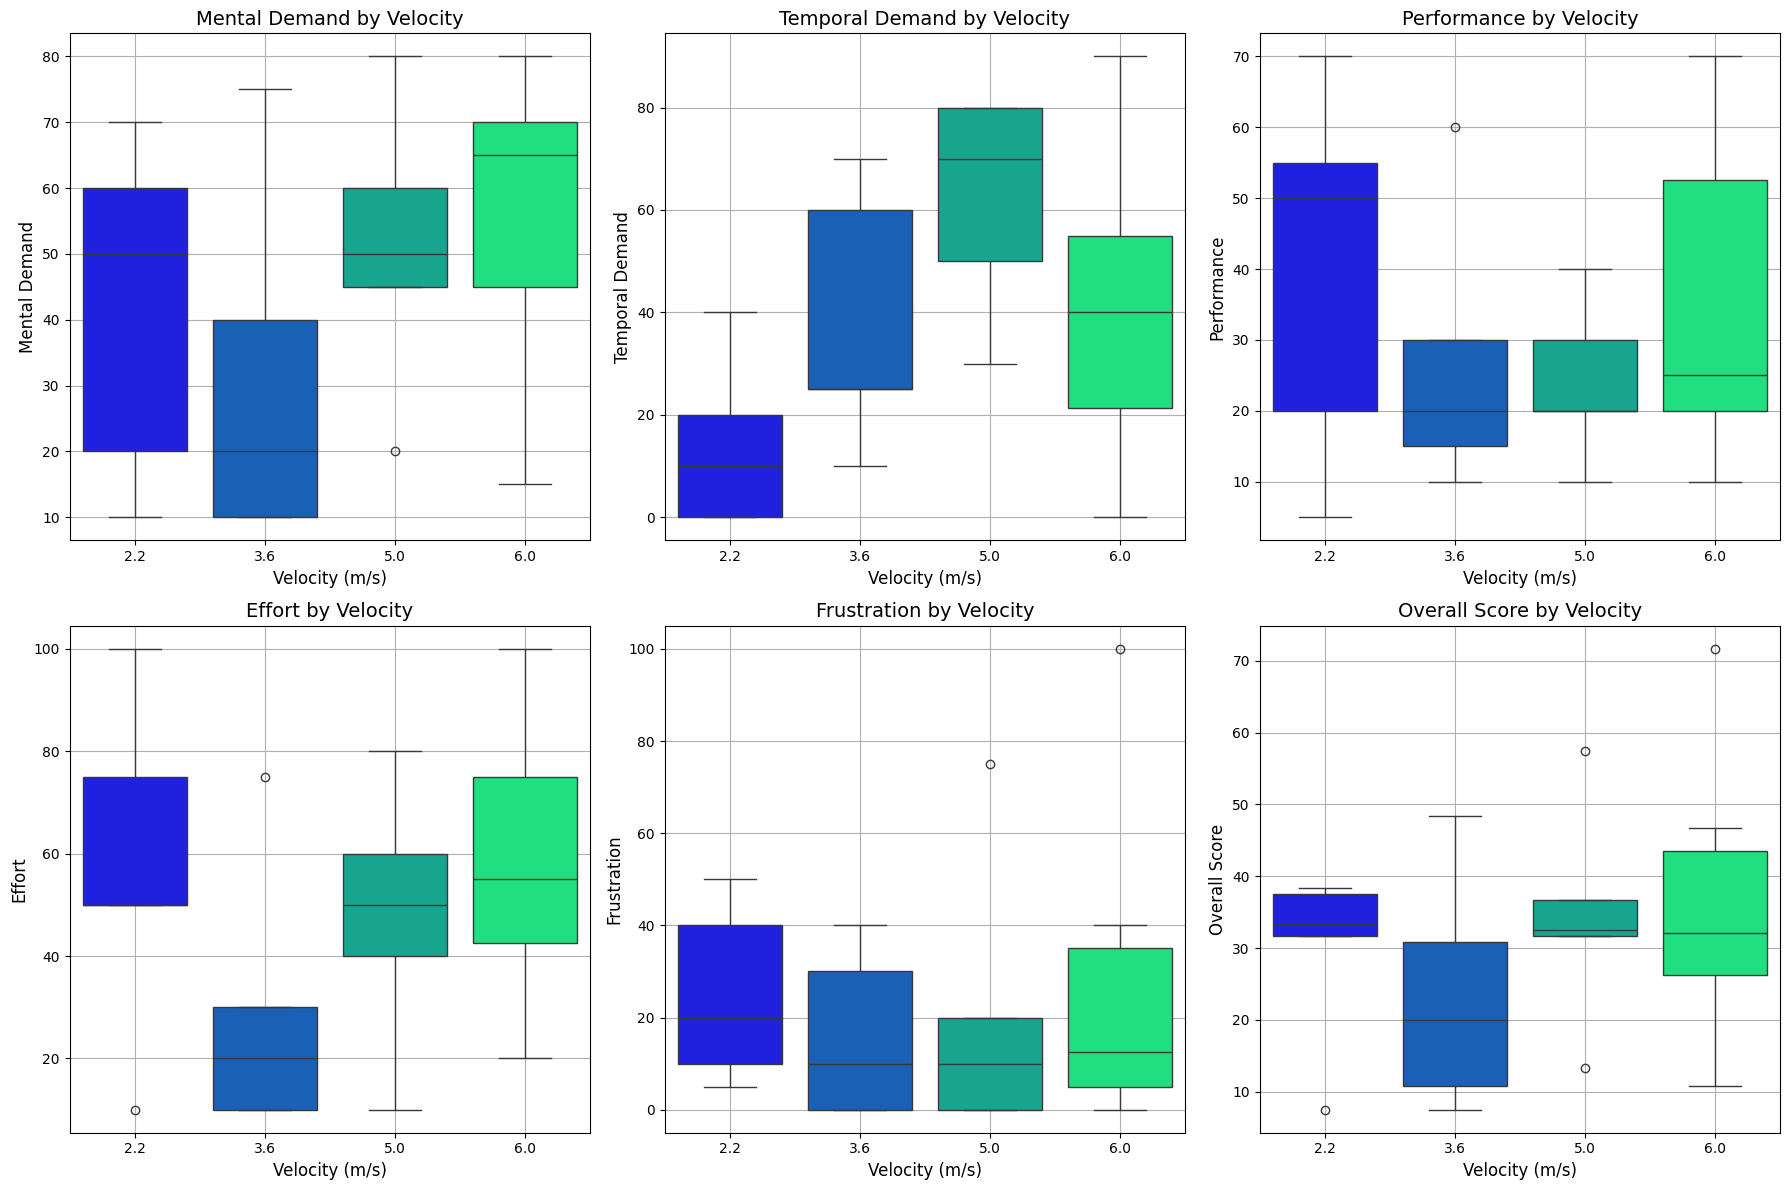

In [45]:
# Let's analyze the NASA-TLX scores by velocity using a box plot for each of the NASA-TLX workload dimensions
# Create a function to plot a box plot for each NASA-TLX dimension
def box_plot(ax, data, x, y, title, xlabel, ylabel, palette):
    sns.boxplot(data=data, x=x, y=y, palette=palette, linewidth=1, ax=ax, legend=False, hue='Velocity(m/s)')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True)

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust the number of subplots

# List of NASA-TLX dimensions to plot
workload_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Loop over each NASA-TLX dimension and create a subplot
for i, dim in enumerate(workload_dimensions):
    box_plot(axes[i//3, i%3], data, 'Velocity(m/s)', dim, f'{dim} by Velocity', 'Velocity (m/s)', dim, palette="winter")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

## 5. Bar plot: Time and Maze Scores by Participant

C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_40792\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)


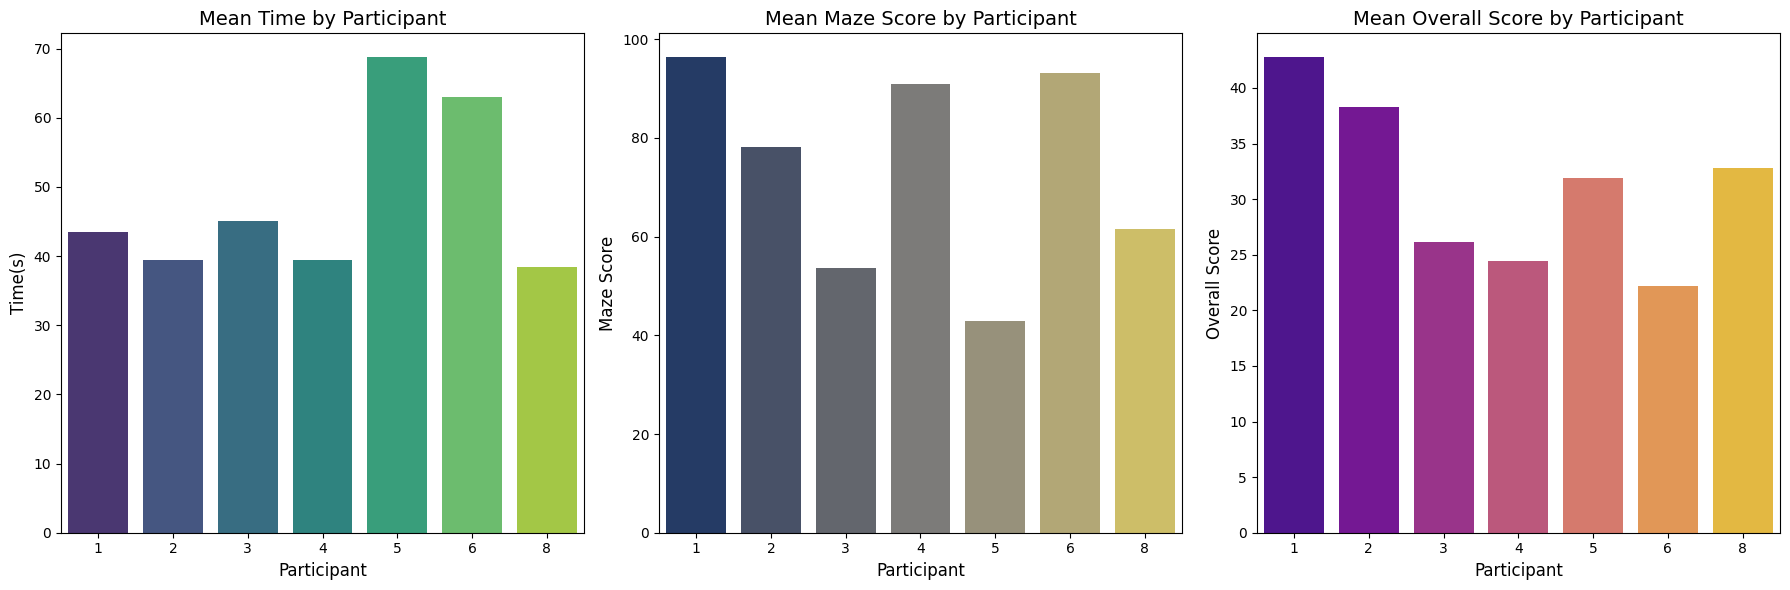

In [46]:
# Bar plot: Mean Maze Score by Participant with Velocity as hue and time delay as hue
# Using the bar_plot function defined earlier
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_plot(axes[0], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', None, 'viridis')
bar_plot(axes[1], data, 'Participant', 'Maze Score', 'Mean Maze Score by Participant', 'Participant', 'Maze Score', None, 'cividis')
bar_plot(axes[2], data, 'Participant', 'Overall Score', 'Mean Overall Score by Participant', 'Participant', 'Overall Score', None, 'plasma')

plt.tight_layout()

## 5.1: Time Scores by participant

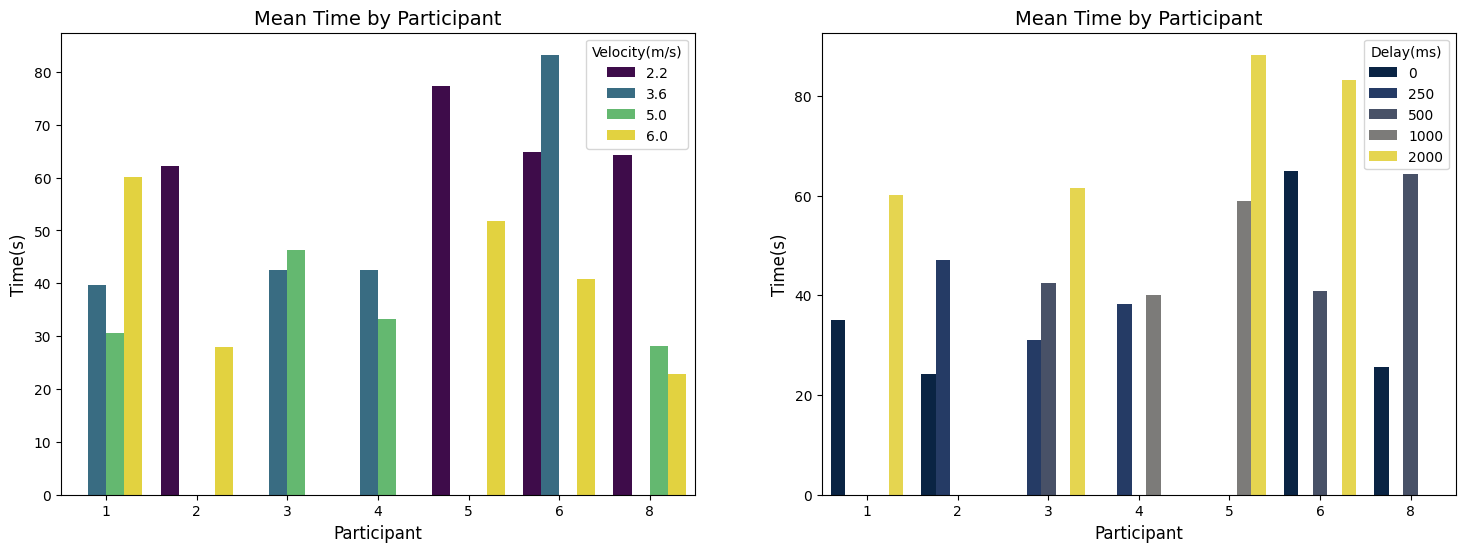

In [47]:
# Bar plot: Time score by Participant 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

bar_plot(axes[0], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', 'Velocity(m/s)', 'viridis')
bar_plot(axes[1], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', 'Delay(ms)', 'cividis')


# Create a 3d plot

In [48]:
# Create an interactive 3d surface plot using Plotly Express to visualize the relationship between Time, Delay, and Velocity
# Create a meshgrid for Delay and Velocity
delay = np.linspace(data['Delay(ms)'].min(), data['Delay(ms)'].max(), 50)
velocity = np.linspace(data['Velocity(m/s)'].min(), data['Velocity(m/s)'].max(), 50)
delay_grid, velocity_grid = np.meshgrid(delay, velocity)

# Interpolate Time(s) values on the meshgrid
time_grid = griddata((data['Delay(ms)'], data['Velocity(m/s)']), data['Time(s)'], (delay_grid, velocity_grid), method='linear')

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=time_grid, x=delay_grid, y=velocity_grid, colorscale='viridis')])
fig.update_layout(scene=dict(xaxis_title='Delay (ms)', yaxis_title='Velocity (m/s)', zaxis_title='Completion Time (s)'),)
fig.update_layout(title='3D Surface Plot of Time vs Delay and Velocity', autosize=False, width=800, height=800)
fig.show()

## Normalizing the data



# Data Normalization

## What is Data Normalization?

Data normalization is a preprocessing step used in data analysis and machine learning. It involves adjusting the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. The goal is to bring all the values into a similar range, typically between 0 and 1 or -1 and 1.

## Why Normalize Data?

1. **Improves Model Performance**: Many machine learning algorithms, such as gradient descent-based methods, perform better when the input features are on a similar scale. Normalization can lead to faster convergence and better performance.

2. **Prevents Dominance**: In datasets with features of varying scales, features with larger ranges can dominate the learning process, leading to biased models. Normalization ensures that each feature contributes equally to the model.

3. **Enhances Numerical Stability**: Normalizing data can improve the numerical stability of algorithms, reducing the risk of computational errors.

4. **Facilitates Comparison**: Normalized data makes it easier to compare different datasets or features, as they are on a common scale.

## Common Normalization Techniques

1. **Min-Max Scaling**: Transforms the data to fit within a specific range, usually [0, 1].
   \[
   X' = \frac{X - X_{min}}{X_{max} - X_{min}}
   \]

2. **Z-Score Normalization (Standardization)**: Transforms the data to have a mean of 0 and a standard deviation of 1.
   \[
   X' = \frac{X - \mu}{\sigma}
   \]
   where \( \mu \) is the mean and \( \sigma \) is the standard deviation of the feature.

3. **Robust Scaling**: Uses the median and the interquartile range (IQR) to scale the data, making it robust to outliers.
   \[
   X' = \frac{X - \text{median}}{\text{IQR}}
   \]

## Example

Consider a dataset with two features: `height` (in cm) and `weight` (in kg). The ranges of these features are vastly different. By normalizing the data, we can ensure that both features contribute equally to the analysis or model training.


By normalizing the data, we have transformed the features to a common scale, making them more suitable for further analysis or machine learning tasks.

## Conclusion

Normalization is a crucial step in data preprocessing that can significantly impact the performance and reliability of machine learning models. By bringing all features to a common scale, normalization ensures that each feature contributes equally to the model, leading to more accurate and stable results.

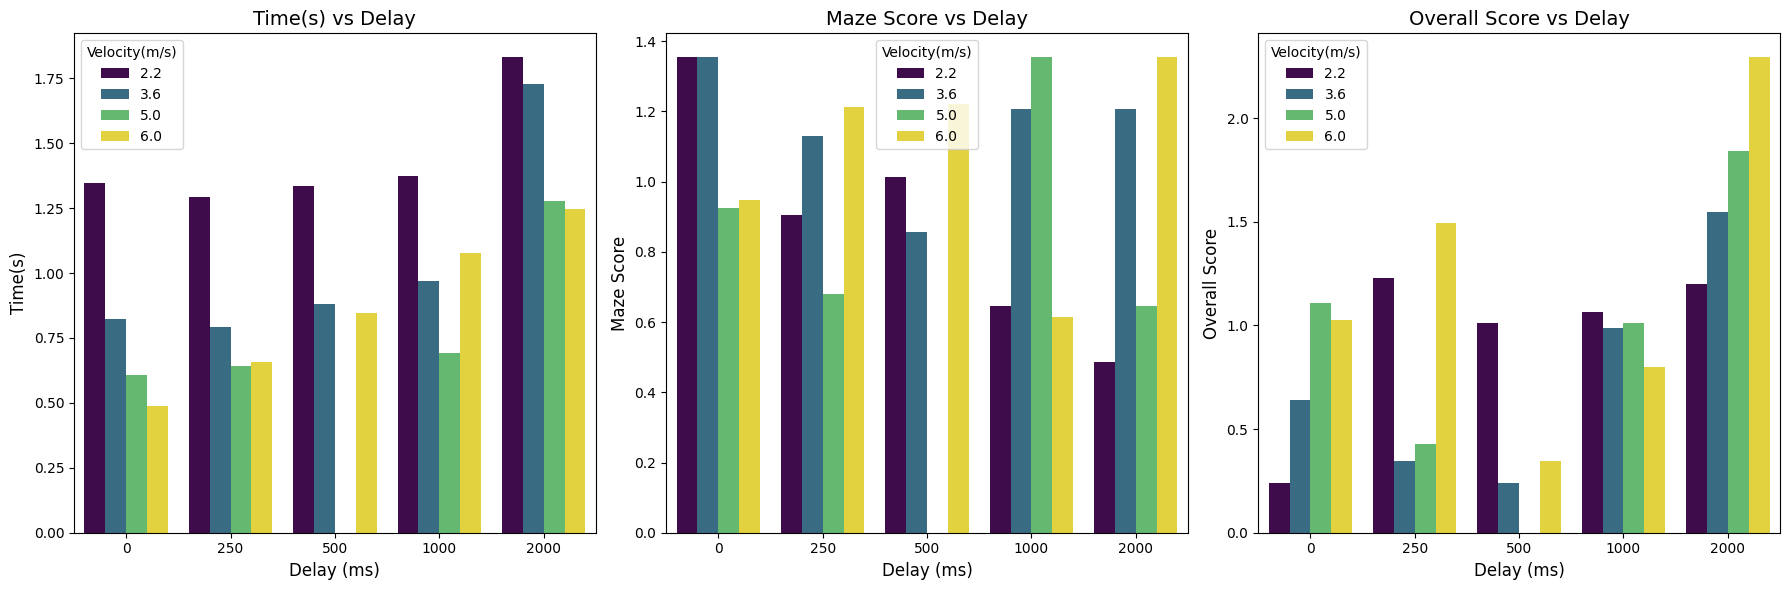

In [49]:
# Normalize the data based on the mean value of the overall sample
data_normalized = data.copy()
data_normalized['Time(s)'] = data['Time(s)'] / data['Time(s)'].mean()
data_normalized['Maze Score'] = data['Maze Score'] / data['Maze Score'].mean()
data_normalized['Overall Score'] = data['Overall Score'] / data['Overall Score'].mean()


# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and
# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot but with different color maps
for i, column in enumerate(columns):
    bar_plot(axes[i], data_normalized, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue="Velocity(m/s)", palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

# Use plotly express to create an interactive 3d surface plot of the normalized data
# Create a meshgrid for Delay and Velocity
delay = np.linspace(data['Delay(ms)'].min(), data['Delay(ms)'].max(), 50)
velocity = np.linspace(data['Velocity(m/s)'].min(), data['Velocity(m/s)'].max(), 50)
delay_grid, velocity_grid = np.meshgrid(delay, velocity)

# Interpolate Time(s) values on the meshgrid
time_grid = griddata((data['Delay(ms)'], data['Velocity(m/s)']), data_normalized['Time(s)'], (delay_grid, velocity_grid), method='linear')

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=time_grid, x=delay_grid, y=velocity_grid, colorscale='inferno')])
fig.update_layout(scene=dict(xaxis_title='Delay (ms)', yaxis_title='Velocity (m/s)', zaxis_title='Normalized Completion Time'),)
fig.update_layout(title='3D Surface Plot of Normalized Time vs Delay and Velocity', autosize=False, width=800, height=800)
fig.show()

## Regression Analysis of Normalized Data

In [50]:
# Define independent and dependent variables
nasa_tlx_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']  # NASA-TLX dimensions

# Normalize Velocities based on the mean value of the overall sample
data_normalized['Velocity(m/s)'] = data['Velocity(m/s)'] / data['Velocity(m/s)'].mean()

independent_vars = ['Delay(ms)', 'Velocity(m/s)']  # Independent variables (Delay and Velocity)
dependent_vars = ['Time(s)', 'Maze Score', 'Overall Score'] + nasa_tlx_dimensions  # Dependent variables


# Initialize a dictionary to collect results for each independent variable
regression_results = {independent_var: [] for independent_var in independent_vars}

# Perform OLS regression for each dependent variable
for dependent_var in dependent_vars:
    if dependent_var in data_normalized.columns:
        # Prepare independent and dependent variables for regression
        X = sm.add_constant(data_normalized[independent_vars])  # Independent variables with constant
        y = data_normalized[dependent_var]  # Dependent variable (normalized)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Collect results for each independent variable in the current model
        for independent_var in independent_vars:
            conf_int = model.conf_int().loc[independent_var]  # Get confidence intervals
            
            # Collect results for the current dependent variable
            regression_results[independent_var].append({
                "Dependent Variable": dependent_var,
                "Coefficient": model.params[independent_var],
                "Standard Error": model.bse[independent_var],
                "t-Value": model.tvalues[independent_var],
                "P>|t|": model.pvalues[independent_var],
                "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
            })

# Display a separate table for each independent variable
for independent_var in independent_vars:
    print(f"OLS Regression Results for Independent Variable: {independent_var}")
    
    # Create a DataFrame to hold the results for this independent variable
    regression_summary_df = pd.DataFrame(regression_results[independent_var])
    
    # Display the table in a formatted style
    display(regression_summary_df.style.format({
        "Coefficient": "{:.4f}",
        "Standard Error": "{:.4f}",
        "t-Value": "{:.4f}",
        "P>|t|": "{:.4f}"
    }))
    
    print("\n")


OLS Regression Results for Independent Variable: Delay(ms)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0004,0.0000,7.4750,0.0000,"[0.000, 0.000]"
1,Maze Score,-0.0001,0.0001,-0.7277,0.4762,"[-0.000, 0.000]"
2,Overall Score,0.0005,0.0001,3.6148,0.0020,"[0.000, 0.001]"
3,Mental Demand,0.0143,0.0068,2.0866,0.0514,"[-0.000, 0.029]"
4,Temporal Demand,0.0071,0.0081,0.8677,0.3970,"[-0.010, 0.024]"
5,Performance,0.0115,0.0060,1.9089,0.0723,"[-0.001, 0.024]"
6,Effort,0.0250,0.0071,3.5077,0.0025,"[0.010, 0.040]"
7,Frustration,0.0268,0.0058,4.6580,0.0002,"[0.015, 0.039]"




OLS Regression Results for Independent Variable: Velocity(m/s)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-0.6750,0.1011,-6.6756,0.0000,"[-0.887, -0.463]"
1,Maze Score,0.0765,0.1943,0.3937,0.6984,"[-0.332, 0.485]"
2,Overall Score,0.4033,0.2669,1.5107,0.1482,"[-0.158, 0.964]"
3,Mental Demand,22.7992,14.6024,1.5613,0.1359,"[-7.879, 53.478]"
4,Temporal Demand,36.4576,17.3495,2.1014,0.0500,"[0.008, 72.908]"
5,Performance,-4.3609,12.8911,-0.3383,0.7391,"[-31.444, 22.722]"
6,Effort,11.4876,15.2378,0.7539,0.4607,"[-20.526, 43.501]"
7,Frustration,9.1841,12.2871,0.7475,0.4644,"[-16.630, 34.998]"


## Regression Analysis: Delays and Velocity

In [51]:
# Nazar-TLX dimensions
nasa_tlx_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Define independent and dependent variables
independent_vars = ['Delay(ms)', 'Velocity(m/s)']  # Independent variables
dependent_vars = ['Time(s)'] + nasa_tlx_dimensions  # Dependent variables

# Initialize a dictionary to hold results for each independent variable
regression_results = {independent_var: [] for independent_var in independent_vars}

# Perform OLS regression for each dependent variable
for dependent_var in dependent_vars:
    if dependent_var in data.columns:
        X = sm.add_constant(data[independent_vars])  # Both independent variables with constant
        y = data[dependent_var]  # Dependent variable
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Collect results for each independent variable in the current model
        for independent_var in independent_vars:
            conf_int = model.conf_int().loc[independent_var]  # Get confidence intervals
            
            # Collect results for the current dependent variable
            regression_results[independent_var].append({
                "Dependent Variable": dependent_var,
                "Coefficient": model.params[independent_var],
                "Standard Error": model.bse[independent_var],
                "t-Value": model.tvalues[independent_var],
                "P>|t|": model.pvalues[independent_var],
                "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
            })

# Display a separate table for each independent variable
for independent_var in independent_vars:
    print(f"OLS Regression Results for Independent Variable: {independent_var}")
    regression_summary_df = pd.DataFrame(regression_results[independent_var])
    display(regression_summary_df.style.format({
        "Coefficient": "{:.4f}",
        "Standard Error": "{:.4f}",
        "t-Value": "{:.4f}",
        "P>|t|": "{:.4f}"
    }))
    print("\n")


OLS Regression Results for Independent Variable: Delay(ms)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0171,0.0023,7.4750,0.0000,"[0.012, 0.022]"
1,Mental Demand,0.0143,0.0068,2.0866,0.0514,"[-0.000, 0.029]"
2,Temporal Demand,0.0071,0.0081,0.8677,0.3970,"[-0.010, 0.024]"
3,Performance,0.0115,0.0060,1.9089,0.0723,"[-0.001, 0.024]"
4,Effort,0.0250,0.0071,3.5077,0.0025,"[0.010, 0.040]"
5,Frustration,0.0268,0.0058,4.6580,0.0002,"[0.015, 0.039]"
6,Overall Score,0.0141,0.0039,3.6148,0.0020,"[0.006, 0.022]"




OLS Regression Results for Independent Variable: Velocity(m/s)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-7.5939,1.1376,-6.6756,0.0000,"[-9.984, -5.204]"
1,Mental Demand,5.3198,3.4072,1.5613,0.1359,"[-1.839, 12.478]"
2,Temporal Demand,8.5068,4.0482,2.1014,0.0500,"[0.002, 17.012]"
3,Performance,-1.0175,3.0079,-0.3383,0.7391,"[-7.337, 5.302]"
4,Effort,2.6804,3.5555,0.7539,0.4607,"[-4.789, 10.150]"
5,Frustration,2.1430,2.8670,0.7475,0.4644,"[-3.880, 8.166]"
6,Overall Score,2.9387,1.9453,1.5107,0.1482,"[-1.148, 7.026]"


## Regresion OLS for each velocity

OLS Regression Results for Velocity = 2.2 m/s


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0124,0.0032,3.8240,0.0315,"[0.002, 0.023]"
1,Maze Score,-0.0281,0.0081,-3.4762,0.0402,"[-0.054, -0.002]"
2,Mental Demand,0.0050,0.0187,0.2676,0.8063,"[-0.054, 0.064]"
3,Temporal Demand,-0.0010,0.0122,-0.0819,0.9399,"[-0.040, 0.038]"
4,Performance,0.0150,0.0175,0.8589,0.4535,"[-0.041, 0.071]"
5,Effort,0.0345,0.0142,2.4360,0.0928,"[-0.011, 0.080]"
6,Frustration,0.0005,0.0141,0.0354,0.9740,"[-0.044, 0.045]"
7,Overall Score,0.0090,0.0077,1.1713,0.3260,"[-0.015, 0.033]"




OLS Regression Results for Velocity = 3.6 m/s


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0225,0.0045,4.9994,0.0154,"[0.008, 0.037]"
1,Maze Score,0.0005,0.0099,0.0482,0.9646,"[-0.031, 0.032]"
2,Mental Demand,0.0325,0.0071,4.5696,0.0197,"[0.010, 0.055]"
3,Temporal Demand,0.0135,0.0170,0.7929,0.4858,"[-0.041, 0.068]"
4,Performance,0.0125,0.0126,0.9926,0.3941,"[-0.028, 0.053]"
5,Effort,0.0315,0.0077,4.1155,0.0260,"[0.007, 0.056]"
6,Frustration,0.0200,0.0065,3.0619,0.0549,"[-0.001, 0.041]"
7,Overall Score,0.0183,0.0059,3.1204,0.0525,"[-0.000, 0.037]"




OLS Regression Results for Velocity = 5.0 m/s


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0150,0.0035,4.2584,0.0237,"[0.004, 0.026]"
1,Maze Score,-0.0032,0.0171,-0.1891,0.8621,"[-0.058, 0.051]"
2,Mental Demand,0.0167,0.0111,1.4990,0.2308,"[-0.019, 0.052]"
3,Temporal Demand,-0.0014,0.0146,-0.0932,0.9316,"[-0.048, 0.045]"
4,Performance,0.0058,0.0069,0.8345,0.4652,"[-0.016, 0.028]"
5,Effort,0.0225,0.0116,1.9515,0.1461,"[-0.014, 0.059]"
6,Frustration,0.0345,0.0068,5.0645,0.0149,"[0.013, 0.056]"
7,Overall Score,0.0130,0.0075,1.7442,0.1795,"[-0.011, 0.037]"




OLS Regression Results for Velocity = 6.0 m/s


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0187,0.0029,6.4300,0.0030,"[0.011, 0.027]"
1,Maze Score,0.0075,0.0127,0.5865,0.5890,"[-0.028, 0.043]"
2,Mental Demand,0.0053,0.0155,0.3404,0.7507,"[-0.038, 0.048]"
3,Temporal Demand,0.0166,0.0190,0.8740,0.4314,"[-0.036, 0.069]"
4,Performance,0.0139,0.0141,0.9821,0.3816,"[-0.025, 0.053]"
5,Effort,0.0156,0.0168,0.9258,0.4070,"[-0.031, 0.062]"
6,Frustration,0.0476,0.0066,7.2403,0.0019,"[0.029, 0.066]"
7,Overall Score,0.0165,0.0107,1.5346,0.1997,"[-0.013, 0.046]"


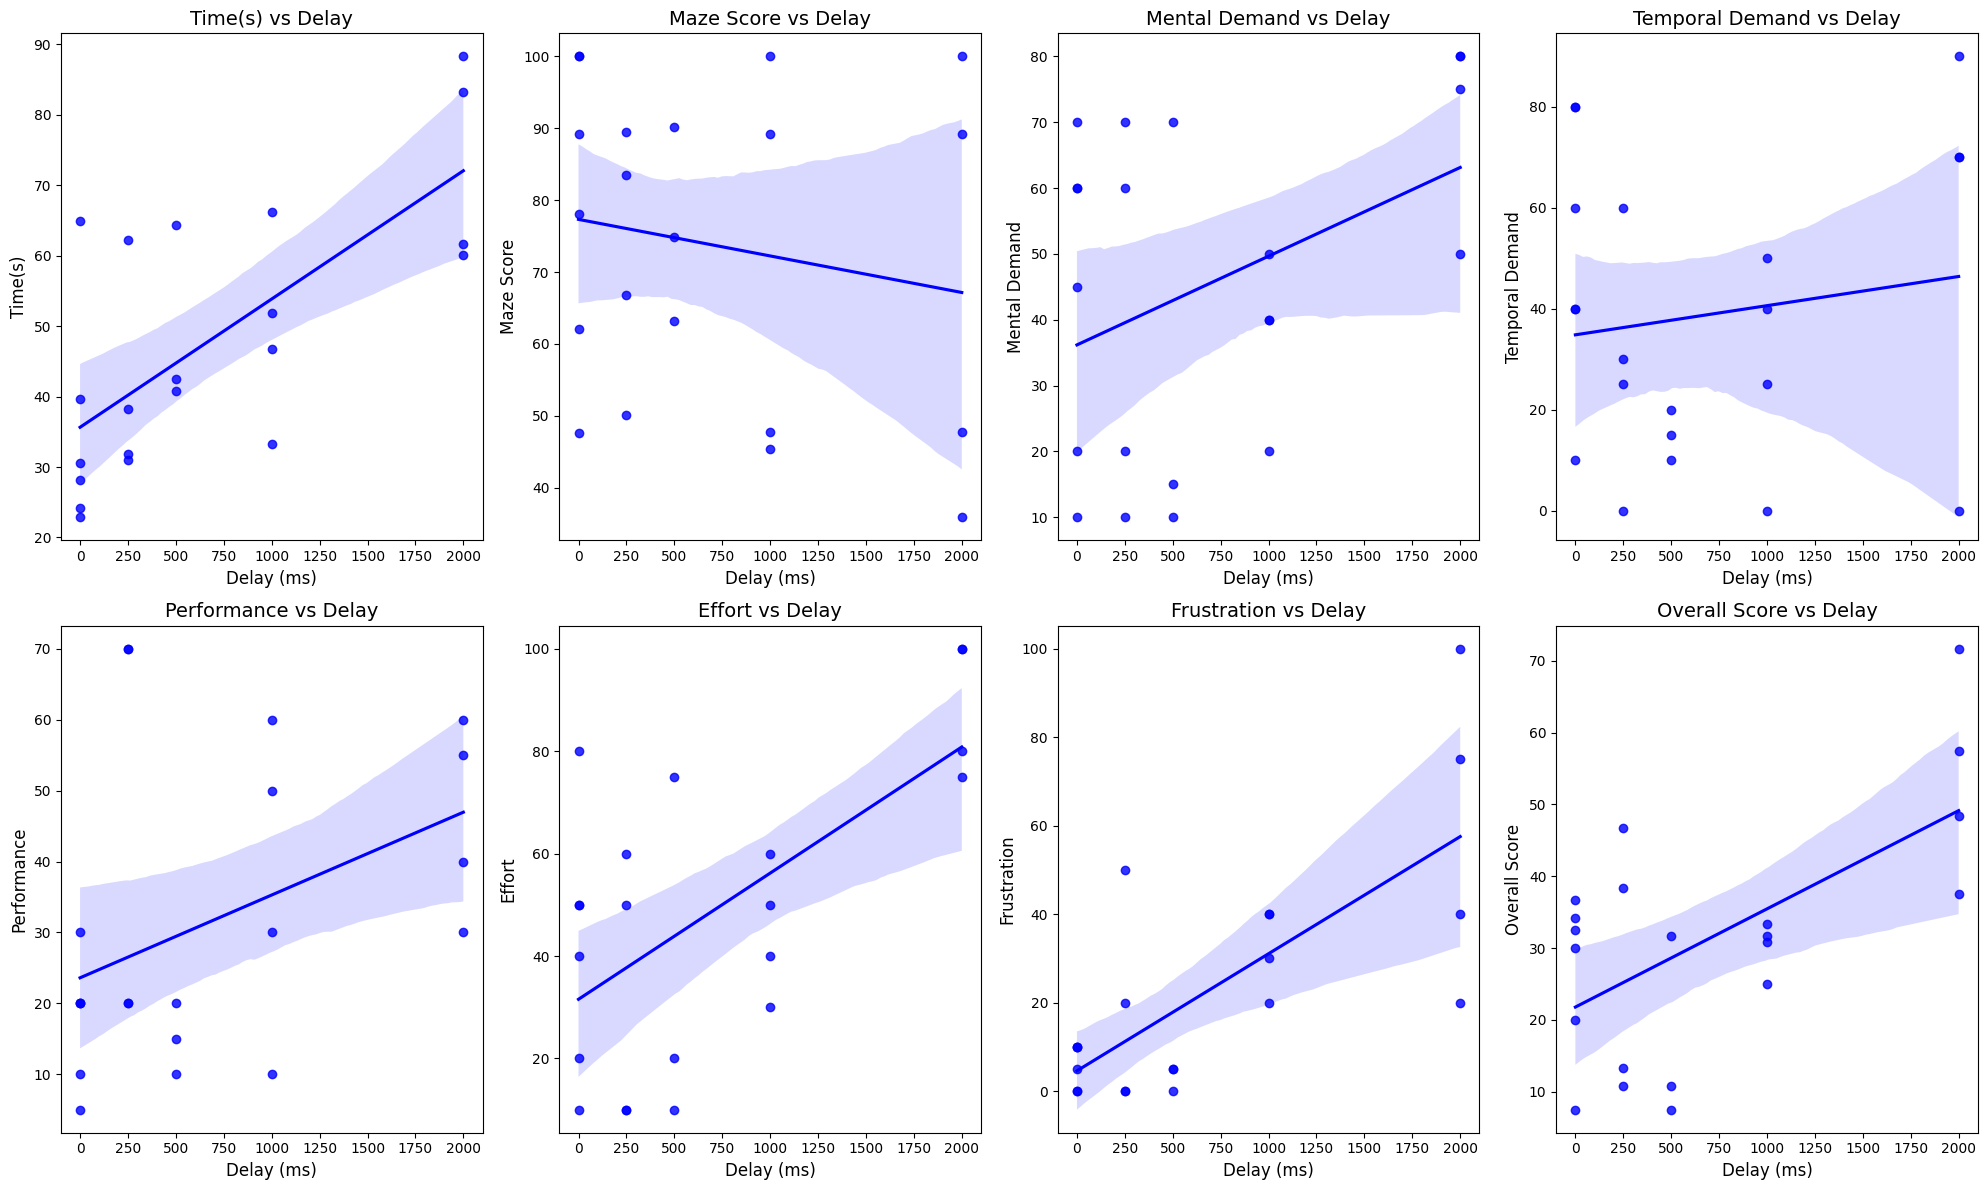

In [60]:
# Nasa-TLX dimensions to analyze
nasa_tlx_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Define independent and dependent variables
independent_var = 'Delay(ms)'  # Independent variable (Delay)
dependent_vars = ['Time(s)', 'Maze Score'] + nasa_tlx_dimensions  # Dependent variables

# Get unique velocity values and sort them in increasing order
velocities = sorted(data['Velocity(m/s)'].unique())

# Initialize a dictionary to hold results for each velocity
regression_results_by_velocity = {}

# Perform OLS regression for each dependent variable at each velocity level
for velocity in velocities:
    regression_results = []
    
    # Subset the data for the current velocity
    subset_data = data[data['Velocity(m/s)'] == velocity]
    
    for dependent_var in dependent_vars:
        if dependent_var in subset_data.columns:
            X = sm.add_constant(subset_data[[independent_var]])  # Independent variable with constant
            y = subset_data[dependent_var]  # Dependent variable
            
            # Fit the OLS model
            model = sm.OLS(y, X).fit()
            
            # Get the confidence interval for the independent variable
            conf_int = model.conf_int().loc[independent_var]
            
            # Collect results for the current dependent variable
            regression_results.append({
                "Dependent Variable": dependent_var,
                "Coefficient": model.params[independent_var],
                "Standard Error": model.bse[independent_var],
                "t-Value": model.tvalues[independent_var],
                "P>|t|": model.pvalues[independent_var],
                "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
            })
    
    # Store the results for this velocity
    regression_results_by_velocity[velocity] = pd.DataFrame(regression_results)

# Display the OLS regression results for each velocity in ascending order
for velocity, results_df in regression_results_by_velocity.items():
    print(f"OLS Regression Results for Velocity = {velocity} m/s")
    display(results_df.style.format({
        "Coefficient": "{:.4f}",
        "Standard Error": "{:.4f}",
        "t-Value": "{:.4f}",
        "P>|t|": "{:.4f}"
    }))
    print("\n")

# Create a function to plot a scatter plot with a regression line
def scatter_plot(ax, data, x, y, title, xlabel, ylabel, color):
    sns.regplot(data=data, x=x, y=y, ax=ax, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# List of dependent variables to plot
dependent_vars = ['Time(s)', 'Maze Score'] + nasa_tlx_dimensions

# Loop over each dependent variable and create a subplot
for i, dependent_var in enumerate(dependent_vars):
    scatter_plot(axes[i//4, i%4], data, 'Delay(ms)', dependent_var, f'{dependent_var} vs Delay', 'Delay (ms)', dependent_var, 'blue')

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

OLS Regression Results for Delay = 0 ms


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-10.2856,1.3727,-7.4929,0.0017,"[-14.097, -6.474]"
1,Maze Score,-9.5625,5.3406,-1.7905,0.1479,"[-24.390, 5.265]"
2,Mental Demand,15.5700,2.4117,6.4561,0.0030,"[8.874, 22.266]"
3,Temporal Demand,7.4287,8.3646,0.8881,0.4247,"[-15.795, 30.653]"
4,Performance,4.5937,1.8806,2.4427,0.0710,"[-0.628, 9.815]"
5,Effort,15.0697,3.6529,4.1254,0.0145,"[4.928, 25.212]"
6,Frustration,-2.1983,1.2409,-1.7716,0.1512,"[-5.643, 1.247]"
7,Overall Score,6.7440,1.6037,4.2054,0.0136,"[2.292, 11.196]"




OLS Regression Results for Delay = 250 ms


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-7.9417,2.7557,-2.8820,0.1023,"[-19.798, 3.915]"
1,Maze Score,2.1019,7.4064,0.2838,0.8032,"[-29.765, 33.969]"
2,Mental Demand,1.9417,12.4853,0.1555,0.8907,"[-51.778, 55.661]"
3,Temporal Demand,14.1990,3.0911,4.5935,0.0443,"[0.899, 27.499]"
4,Performance,-1.2136,12.2867,-0.0988,0.9303,"[-54.079, 51.652]"
5,Effort,1.2136,11.1881,0.1085,0.9235,"[-46.925, 49.352]"
6,Frustration,-7.7670,8.4543,-0.9187,0.4552,"[-44.143, 28.609]"
7,Overall Score,1.3956,7.5804,0.1841,0.8709,"[-31.220, 34.011]"




OLS Regression Results for Delay = 500 ms


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-5.5939,3.8855,-1.4397,0.3865,"[-54.964, 43.777]"
1,Maze Score,4.8329,5.1532,0.9379,0.5204,"[-60.644, 70.310]"
2,Mental Demand,-12.6805,11.8023,-1.0744,0.4772,"[-162.643, 137.282]"
3,Temporal Demand,-0.9477,2.4230,-0.3911,0.7627,"[-31.735, 29.839]"
4,Performance,-2.5722,0.3908,-6.5818,0.0960,"[-7.538, 2.393]"
5,Effort,-12.4549,13.2874,-0.9373,0.5206,"[-181.287, 156.377]"
6,Frustration,0.2256,1.4851,0.1519,0.9040,"[-18.644, 19.095]"
7,Overall Score,-4.7383,4.8981,-0.9674,0.5106,"[-66.975, 57.498]"




OLS Regression Results for Delay = 1000 ms


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-4.9063,4.6375,-1.0580,0.4010,"[-24.860, 15.047]"
1,Maze Score,1.5383,11.9437,0.1288,0.9093,"[-49.851, 52.928]"
2,Mental Demand,5.8252,3.4433,1.6918,0.2328,"[-8.990, 20.640]"
3,Temporal Demand,-6.6748,7.9883,-0.8356,0.4913,"[-41.046, 27.696]"
4,Performance,-8.9806,7.0126,-1.2806,0.3288,"[-39.153, 21.192]"
5,Effort,0.2427,5.5055,0.0441,0.9688,"[-23.445, 23.931]"
6,Frustration,-1.2136,3.9938,-0.3039,0.7899,"[-18.398, 15.970]"
7,Overall Score,-1.8002,0.8781,-2.0500,0.1769,"[-5.578, 1.978]"




OLS Regression Results for Delay = 2000 ms


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-8.3837,1.8390,-4.5589,0.0449,"[-16.296, -0.471]"
1,Maze Score,11.2743,10.6424,1.0594,0.4005,"[-34.516, 57.065]"
2,Mental Demand,7.6456,2.8840,2.6510,0.1177,"[-4.763, 20.055]"
3,Temporal Demand,21.3592,7.4545,2.8653,0.1033,"[-10.715, 53.433]"
4,Performance,1.4563,5.7837,0.2518,0.8247,"[-23.429, 26.342]"
5,Effort,-0.1214,5.6098,-0.0216,0.9847,"[-24.259, 24.016]"
6,Frustration,21.3592,1.9005,11.2385,0.0078,"[13.182, 29.537]"
7,Overall Score,8.6165,1.0067,8.5595,0.0134,"[4.285, 12.948]"


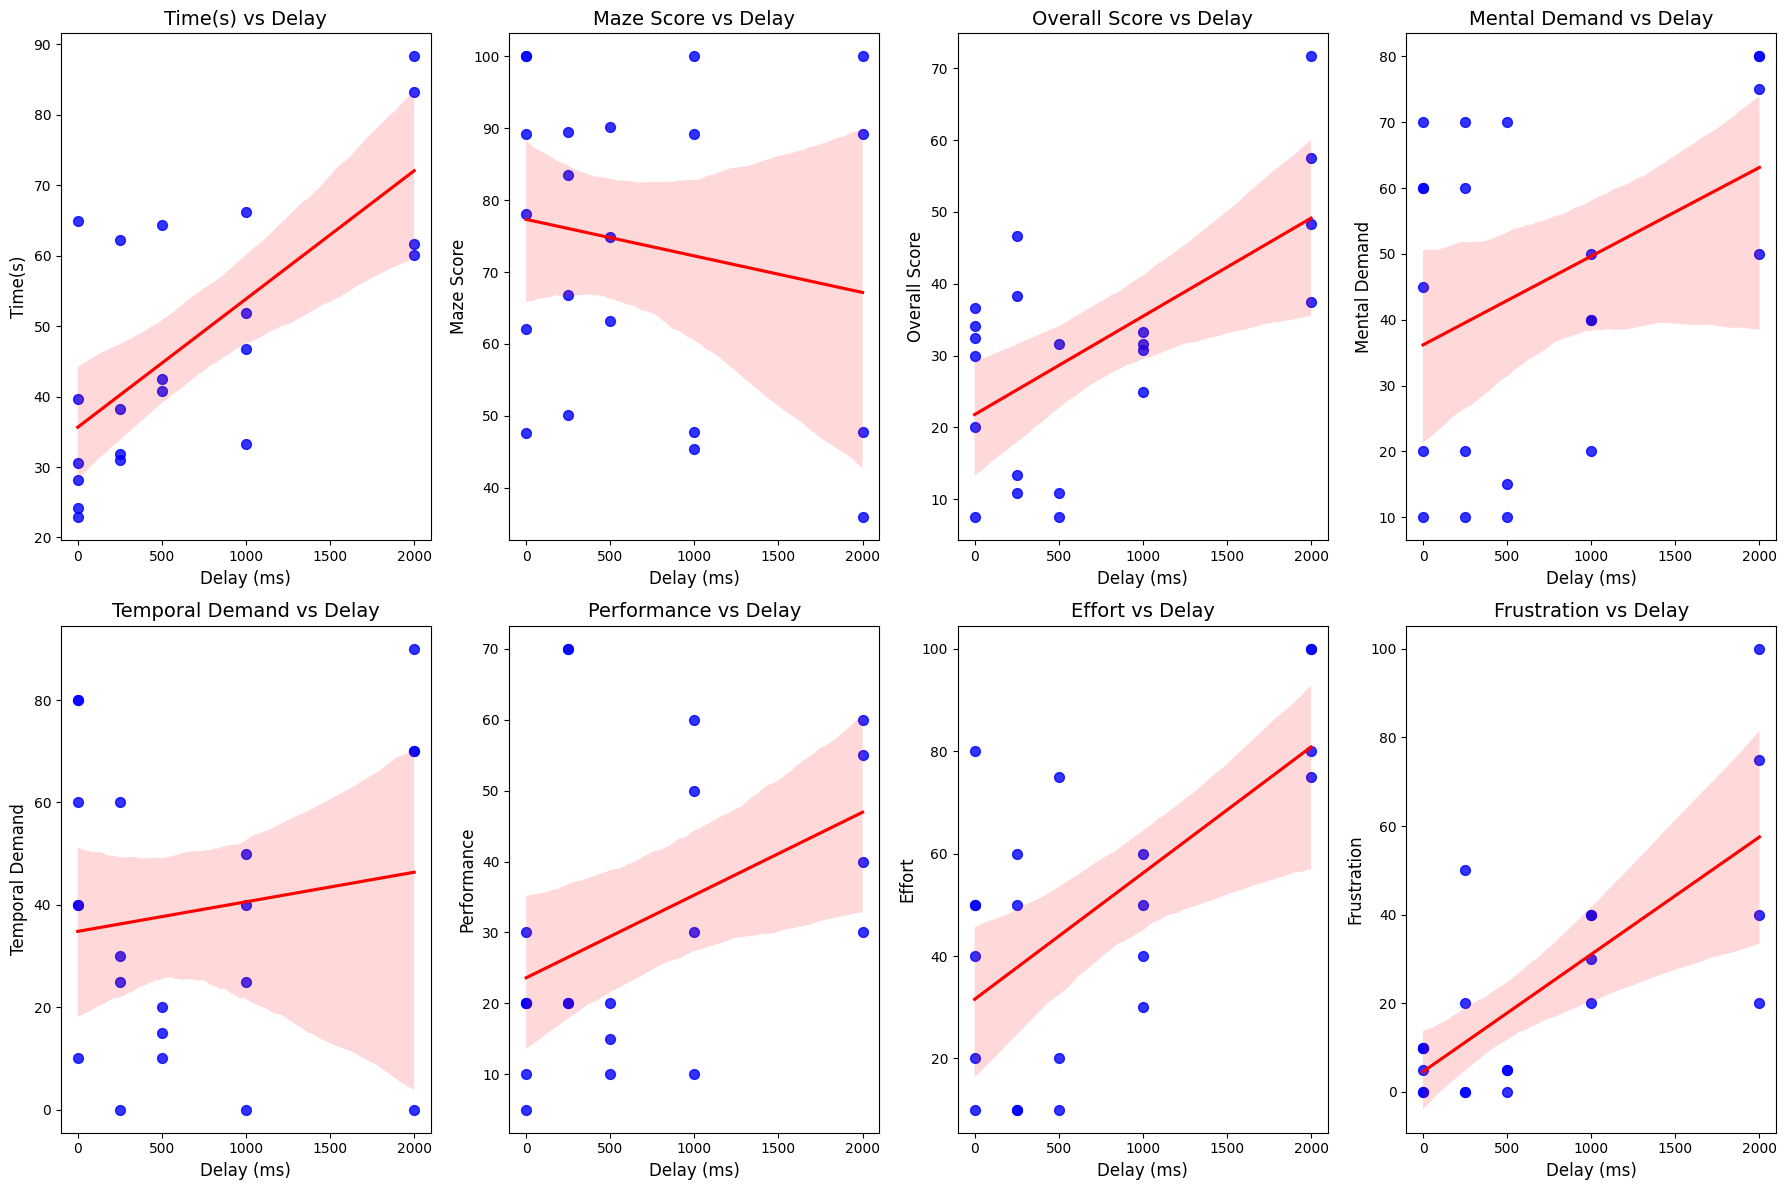

In [58]:
# Define independent and dependent variables
independent_var = 'Velocity(m/s)'  # Independent variable (Velocity)
dependent_vars = ['Time(s)', 'Maze Score'] + nasa_tlx_dimensions  # Dependent variables

# Get unique delay values and sort them in increasing order
delays = sorted(data['Delay(ms)'].unique())

# Initialize a dictionary to hold results for each delay
regression_results_by_delay = {}

# Perform OLS regression for each dependent variable at each delay level

for delay in delays:
    regression_results = []
    
    # Subset the data for the current delay
    subset_data = data[data['Delay(ms)'] == delay]
    
    for dependent_var in dependent_vars:
        if dependent_var in subset_data.columns:
            X = sm.add_constant(subset_data[[independent_var]])  # Independent variable with constant
            y = subset_data[dependent_var]  # Dependent variable
            
            # Fit the OLS model
            model = sm.OLS(y, X).fit()
            
            # Get the confidence interval for the independent variable
            conf_int = model.conf_int().loc[independent_var]
            
            # Collect results for the current dependent variable
            regression_results.append({
                "Dependent Variable": dependent_var,
                "Coefficient": model.params[independent_var],
                "Standard Error": model.bse[independent_var],
                "t-Value": model.tvalues[independent_var],
                "P>|t|": model.pvalues[independent_var],
                "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
            })
    
    # Store the results for this delay
    regression_results_by_delay[delay] = pd.DataFrame(regression_results)

# Display the OLS regression results for each delay in ascending order
for delay, results_df in regression_results_by_delay.items():
    print(f"OLS Regression Results for Delay = {delay} ms")
    display(results_df.style.format({
        "Coefficient": "{:.4f}",
        "Standard Error": "{:.4f}",
        "t-Value": "{:.4f}",
        "P>|t|": "{:.4f}"
    }))
    print("\n")

# Create a function to plot a scatter plot with a regression line
def scatter_plot(ax, data, x, y, title, xlabel, ylabel, hue, palette):
    sns.regplot(x=x, y=y, data=data, ax=ax, color='b', scatter_kws={'s': 50}, line_kws={'color': 'r'})
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(18, 12))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score', 'Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    scatter_plot(axes[i//4, i%4], data, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue="Velocity(m/s)", palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## Heat map

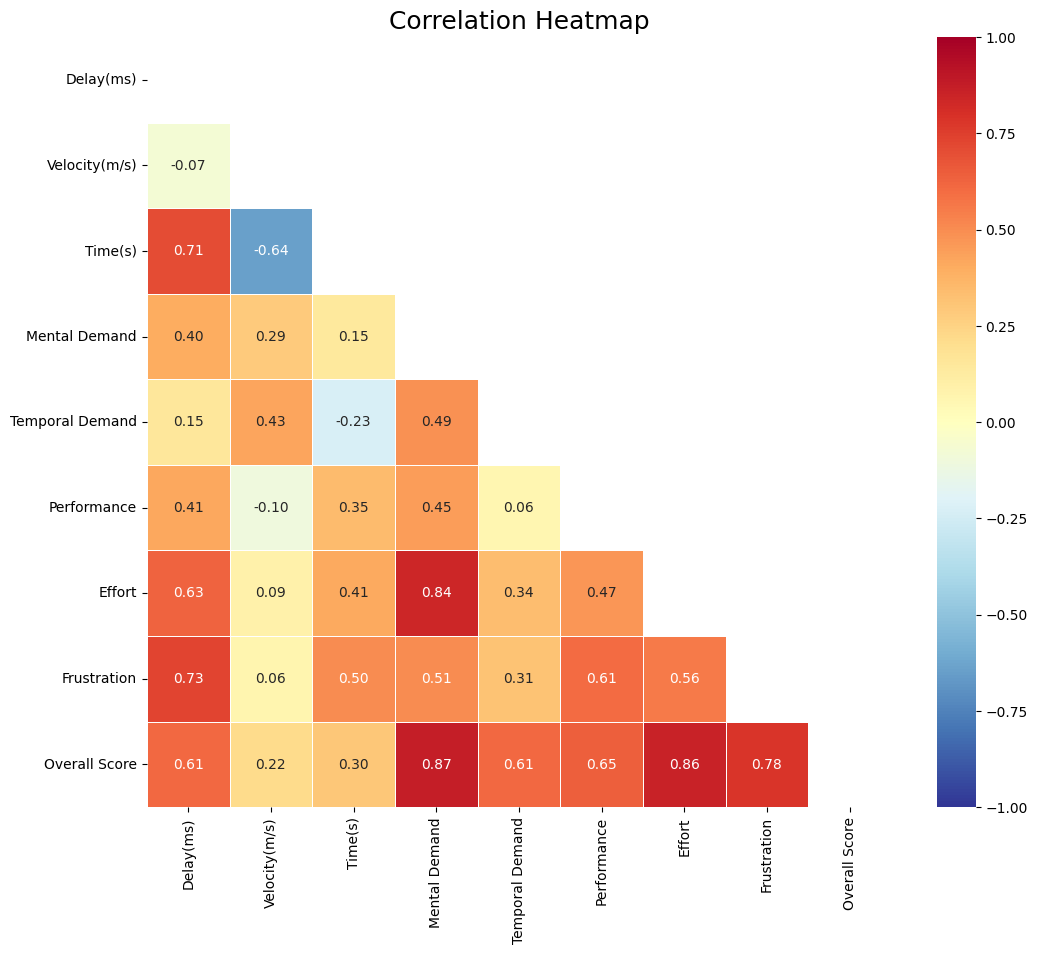

In [61]:
# Plotting a heatmap of correlations between the variables including the independent variable
variables = ['Delay(ms)', 'Velocity(m/s)', 'Time(s)'] + nasa_tlx_dimensions

# Calculate the correlation matrix
correlation_matrix = data_normalized[variables].corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="RdYlBu_r", fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()



## Correlation Map Analysis

The correlation map above provides a visual representation of the relationships between various variables in our dataset. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

### Key Observations:

1. **Delay(ms) vs. Time(s)**:
        - There is a strong positive correlation (0.71) between `Delay(ms)` and `Time(s)`. This suggests that as the delay increases, the time taken to complete the maze also increases.

2. **Delay(ms) vs. Overall Score**:
        - There is a moderate positive correlation (0.61) between `Delay(ms)` and `Overall Score`. This indicates that higher delays are associated with higher overall scores, which might be due to the increased difficulty and effort required.

3. **Delay(ms) vs. Maze Score**:
        - The correlation between `Delay(ms)` and `Maze Score` is not explicitly shown in the provided correlation matrix, but it can be inferred from the overall score and other related metrics.

### Delays Relationship with Time Scores, Overall Score, and Maze Score:

- **Time Scores**:
    - The positive correlation between `Delay(ms)` and `Time(s)` indicates that participants take longer to complete the maze as the delay increases. This is expected as higher delays can introduce more challenges and obstacles, leading to longer completion times.

- **Overall Score**:
    - The moderate positive correlation between `Delay(ms)` and `Overall Score` suggests that participants' overall performance scores tend to increase with higher delays. This could be due to the increased effort and mental demand required to navigate the maze under higher delays, which might be reflected in the overall scoring.

- **Maze Score**:
    - While the direct correlation between `Delay(ms)` and `Maze Score` is not provided, it can be inferred that delays impact the maze score. Higher delays likely make the maze more challenging, potentially affecting the participants' scores. The overall score, which includes the maze score, shows a positive correlation with delays, indicating that delays do have an impact on performance metrics.

In summary, the correlation map highlights the significant relationships between delays and various performance metrics, emphasizing the impact of delays on time scores, overall scores, and maze scores.

## 7. Save analyzed data

In [21]:
# Save the analyzed dataset to a CSV for further analysis if needed
data.to_csv("analyzed_data_output.csv", index=False)